In [1]:
%matplotlib inline
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import ElevationHandler, transform_coordinates, import_point_source_data, calc_direct_path, calc_diffraction, get_linecut, calc_diffraction_path, A_weighting
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata


ImportError: cannot import name 'calc_direct_path' from 'src.utils' (/home/frederikwr/Dropbox/DTU Special Course/src/utils.py)

In [2]:
C2 = 20
f = 1000 # frequency [Hz]
c = 346 # speed of sound in air [m/s]
wavelength = c/f

e = 1 # distance between the screens in the direction of the source and receiver [m]
d_ss = 1 # perpendicular distance from source to plane of screen [m]
d_sr = 1 # perpendicular distance from plane of screen to receiver [m]

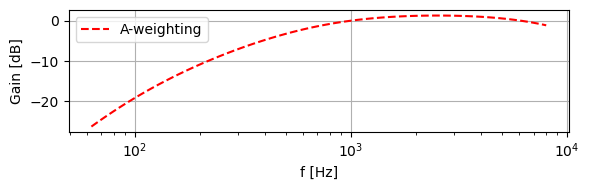

In [3]:
f = np.logspace(np.log10(63), np.log10(8000), 100, endpoint=True)
Af = A_weighting(f)
fig, axes = plt.subplots(figsize = (6,2))
axes.semilogx(f, Af, "r--", label = "A-weighting")
axes.set(xlabel = "f [Hz]",
       ylabel = "Gain [dB]")
axes.grid()
axes.legend()
plt.tight_layout()

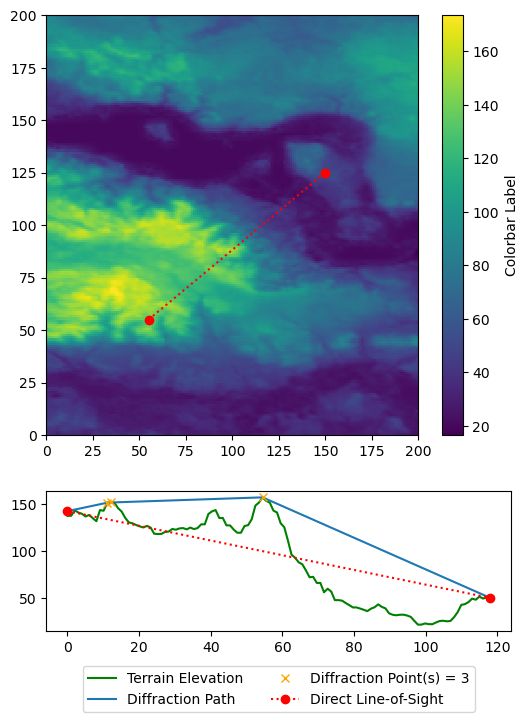

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load terrain data from file
terrain_data = np.loadtxt("../../assets/map.txt")

# Define pixel coordinates for the line of sight
start_pixel = (55, 55)
end_pixel = (150, 125)

# Calculate the length and create coordinates along the line of sight
length = int(np.hypot(end_pixel[0] - start_pixel[0], end_pixel[1] - start_pixel[1]))
x_coords, y_coords = np.linspace(start_pixel[0], end_pixel[0], length), np.linspace(start_pixel[1], end_pixel[1], length)

# Set source and receiver heights
source_height = 5
receiver_height = 0

# Create distance points along the line of sight
distance_points = np.linspace(0, length, length)

# Plot the terrain map
fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize=(6, 8))
terrain_plot = axes[0].pcolormesh(terrain_data)
axes[0].plot([start_pixel[0], end_pixel[0]], [start_pixel[1], end_pixel[1]], 'ro:')
colorbar = fig.colorbar(terrain_plot, ax=axes[0], orientation='vertical', label='Colorbar Label')

# Extract elevation values along the line of sight
elevation_values = terrain_data.T[x_coords.astype(int), y_coords.astype(int)]

# Calculate diffraction path
diffraction_path = calc_diffraction(source_height, receiver_height, distance_points, elevation_values)

# Plot terrain elevation and diffraction path
axes[1].plot(distance_points, elevation_values, label="Terrain Elevation", color="green")
axes[1].plot(*diffraction_path.T, label="Diffraction Path")
axes[1].plot(*diffraction_path[1:-1].T, color="orange", marker="x",
             label=f"Diffraction Point(s) = {diffraction_path.shape[0] - 2}", linestyle='None')
axes[1].plot([0, length], [elevation_values[0] + source_height, elevation_values[-1] + receiver_height], 'ro:',
             label="Direct Line-of-Sight")

# Configure legend placement
legend = axes[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Display the plot
plt.show()


In [5]:
map_boundaries = [11.9, 12.1, 54.9, 55.1]
map_shape = [100, 100]
elevation_handler = ElevationHandler(map_boundaries, map_shape)
point_source_data = import_point_source_data().iloc[0]

d, dss, dsr, e = calc_diffraction_path(elevation_handler, point_source_data)

ValueError: too many values to unpack (expected 4)

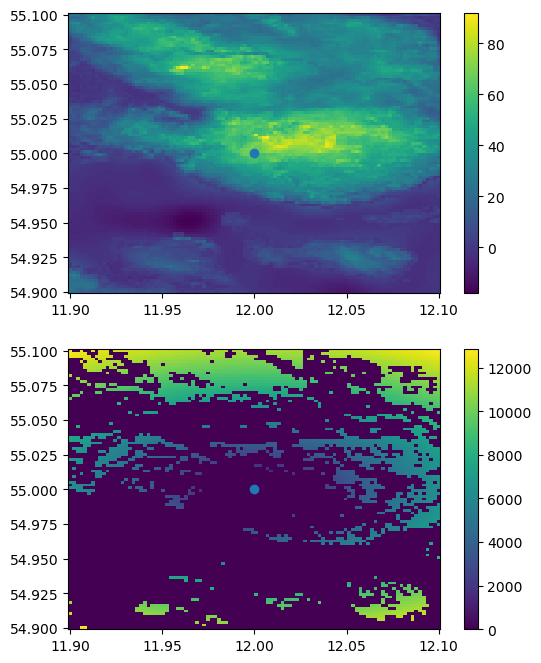

In [ ]:
map_array, long_range, lat_range = elevation_handler.map_array, elevation_handler.long_range, elevation_handler.lat_range
longitude, latitude, source_height = point_source_data.longitude, point_source_data.latitude, point_source_data.h

fig, axes = plt.subplots(2, 1, figsize = (6, 8))
pcm1 = axes[0].pcolormesh(long_range, lat_range, map_array)
plt.colorbar(pcm1, ax=axes[0])
axes[0].scatter(longitude, latitude)
pcm2 = axes[1].pcolormesh(long_range, lat_range, dss+e+dsr)
axes[1].scatter(longitude, latitude)
plt.colorbar(pcm2, ax=axes[1])

In [ ]:
map_boundaries = [11.9, 12.1, 54.9, 55.1]
map_shape = [100, 100]
elevation_handler = ElevationHandler(map_boundaries, map_shape)
point_source_data = import_point_source_data().iloc[0]

d2 = calc_direct_path(elevation_handler, point_source_data)

52.319870077988526


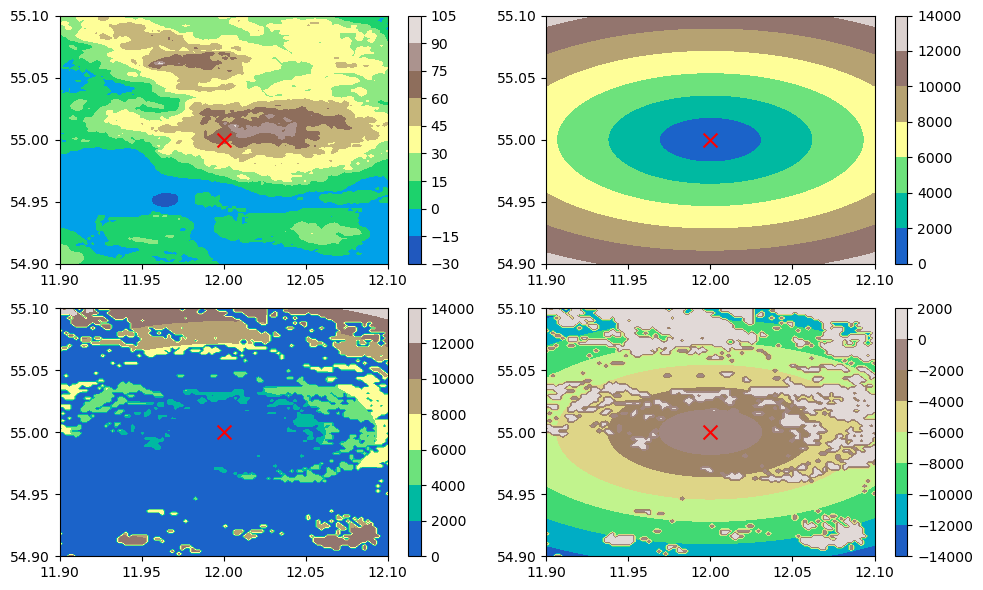

In [ ]:
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
# map_array = np.loadtxt("map.txt")

fig, axes = plt.subplots(2,2, figsize=(10, 6))
pcm1 = axes[0, 0].contourf(elevation_handler.long_range, elevation_handler.lat_range, elevation_handler.map_array, cmap = "terrain")
plt.colorbar(pcm1, ax = axes[0,0])
axes[0, 0].scatter(point_source_data.longitude, point_source_data.latitude, marker = "x", color = "red", s = 100)

pcm2 = axes[0, 1].contourf(elevation_handler.long_range, elevation_handler.lat_range, d, cmap = "terrain")
plt.colorbar(pcm2, ax = axes[0, 1])
axes[0, 1].scatter(point_source_data.longitude, point_source_data.latitude, marker = "x", color = "red", s = 100)

pcm3 = axes[1, 0].contourf(elevation_handler.long_range, elevation_handler.lat_range, dsr+dss+e, cmap = "terrain")
plt.colorbar(pcm3, ax = axes[1, 0])
axes[1, 0].scatter(point_source_data.longitude, point_source_data.latitude, marker = "x", color = "red", s = 100)

pcm4 = axes[1, 1].contourf(elevation_handler.long_range, elevation_handler.lat_range, (dsr+dss+e-d), cmap = "terrain")
plt.colorbar(pcm4, ax = axes[1, 1])
axes[1, 1].scatter(point_source_data.longitude, point_source_data.latitude, marker = "x", color = "red", s = 100)
plt.tight_layout()

test = (dsr+dss+e-d)
print(np.max(test))

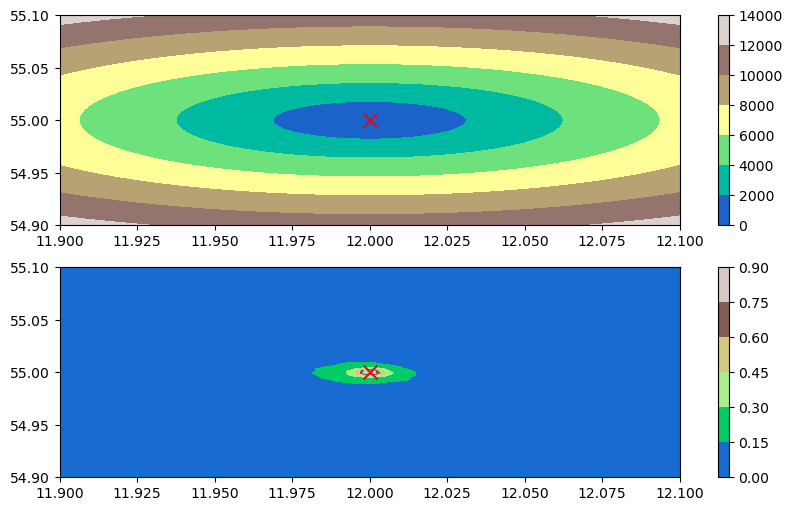

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10, 6))
pcm1 = axes[0].contourf(elevation_handler.long_range, elevation_handler.lat_range, d, cmap = "terrain")
plt.colorbar(pcm1, ax = axes[0])
axes[0].scatter(point_source_data.longitude, point_source_data.latitude, marker = "x", color = "red", s = 100)

pcm2 = axes[1].contourf(elevation_handler.long_range, elevation_handler.lat_range, d-d2, cmap = "terrain")
plt.colorbar(pcm2, ax = axes[1])
axes[1].scatter(point_source_data.longitude, point_source_data.latitude, marker = "x", color = "red", s = 100)

/tmp/ipykernel_396/2574214114.py:10: RuntimeWarning: divide by zero encountered in divide
  Kmet = np.exp(-(1/2000) * np.sqrt((dss * dsr * d)/(2 * z)))


[Text(0.5, 0, 'Distance Source - Receiver [m]'), Text(0, 0.5, '$K_{met}$')]

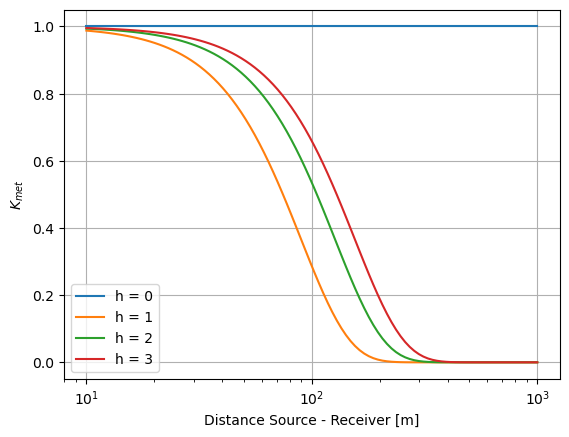

In [ ]:
hb = np.arange(0, 4, 1) # height barrier
d = np.logspace(np.log10(10), np.log10(1000), 100)

fig, ax = plt.subplots()
for i, h in enumerate(hb):
    dss = np.hypot(d/2, h)
    dsr = dss
    z = (dsr + dss) - d
    mask = z <= 0
    Kmet = np.exp(-(1/2000) * np.sqrt((dss * dsr * d)/(2 * z)))
    Kmet[mask] = 1
    ax.semilogx(d, Kmet, label = f"h = {h}")
ax.legend()
ax.grid()
ax.set(xlabel = "Distance Source - Receiver [m]",
       ylabel = r"$K_{met}$")